In [4]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [5]:
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [7]:
# @profile
def read_grid(filename):
    grid = []
    with open(filename) as f:
        w, h = map(int, f.readline().split(maxsplit=1))
        
        for y in range(h):
            grid.append([0] * w)
        
        for no, line in enumerate(f):
            try:
                y, x = map(int, line.split(maxsplit=1))

                if y < 0 or x < 0:
                    raise ValueError

            except ValueError:
                raise Exception(f"Invalid cell on line {no + 2}.")

            grid[y][x] = 1

    return grid

Rules:
- Any live cell with fewer than two live neighbours dies, as if by underpopulation.
- Any live cell with two or three live neighbours lives on to the next generation.
- Any live cell with more than three live neighbours dies, as if by overpopulation.
- Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

In [9]:
# @profile
def tick(grid):
    h, w = len(grid), len(grid[0])

    nextgrid = []
    for y in range(h):
        nextgrid.append([0] * w)

    for y, row in enumerate(grid):
        for x, cell in enumerate(row):
            count = 0
            if y > 0:
                count += grid[y-1][x-1] if x > 0 else 0
                count += grid[y-1][x]
                count += grid[y-1][x+1] if x < w - 1 else 0
            count += grid[y][x-1] if x > 0 else 0
            count += grid[y][x+1] if x < w - 1 else 0
            if y < h - 1:
                count += grid[y+1][x-1] if x > 0  else 0
                count += grid[y+1][x] 
                count += grid[y+1][x+1] if x < w - 1 else 0

            nextgrid[y][x] = 1 if count == 3 or (cell and count == 2) else 0

    return nextgrid

In [10]:
filename = "data/input_5x5.txt"

In [11]:
%lprun -f read_grid read_grid(filename)
grid = read_grid(filename)

Timer unit: 1e-07 s

Total time: 0.0008542 s
File: C:\Users\jazib\AppData\Local\Temp\ipykernel_25772\531961763.py
Function: read_grid at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def read_grid(filename):
     3         1         15.0     15.0      0.2      grid = []
     4         2       4892.0   2446.0     57.3      with open(filename) as f:
     5         1       2153.0   2153.0     25.2          w, h = map(int, f.readline().split(maxsplit=1))
     6                                                   
     7         6        112.0     18.7      1.3          for y in range(h):
     8         5        228.0     45.6      2.7              grid.append([0] * w)
     9                                                   
    10         6        725.0    120.8      8.5          for no, line in enumerate(f):
    11         5         49.0      9.8      0.6              try:
    12         5        197.0     39.4      

In [12]:
grid

[[0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 1, 1, 0],
 [0, 0, 0, 0, 0]]

In [13]:
%lprun -f tick tick (grid)
nextgrid = tick(grid)

Timer unit: 1e-07 s

Total time: 0.0007377 s
File: C:\Users\jazib\AppData\Local\Temp\ipykernel_25772\1953635787.py
Function: tick at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def tick(grid):
     3         1         36.0     36.0      0.5      h, w = len(grid), len(grid[0])
     4                                           
     5         1         14.0     14.0      0.2      nextgrid = []
     6         6         91.0     15.2      1.2      for y in range(h):
     7         5        121.0     24.2      1.6          nextgrid.append([0] * w)
     8                                           
     9         6         96.0     16.0      1.3      for y, row in enumerate(grid):
    10        30        448.0     14.9      6.1          for x, cell in enumerate(row):
    11        25        208.0      8.3      2.8              count = 0
    12        25        249.0     10.0      3.4              if y > 0:
    13      

In [14]:
nextgrid

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0],
 [0, 0, 1, 1, 0],
 [0, 0, 1, 0, 0]]

In [ ]:
num_generations = 4

nextgrid = grid.copy()
for i in range(num_generations):
    nextgrid = tick(nextgrid)

nextgrid

**Memory Profiler Results for the same code**


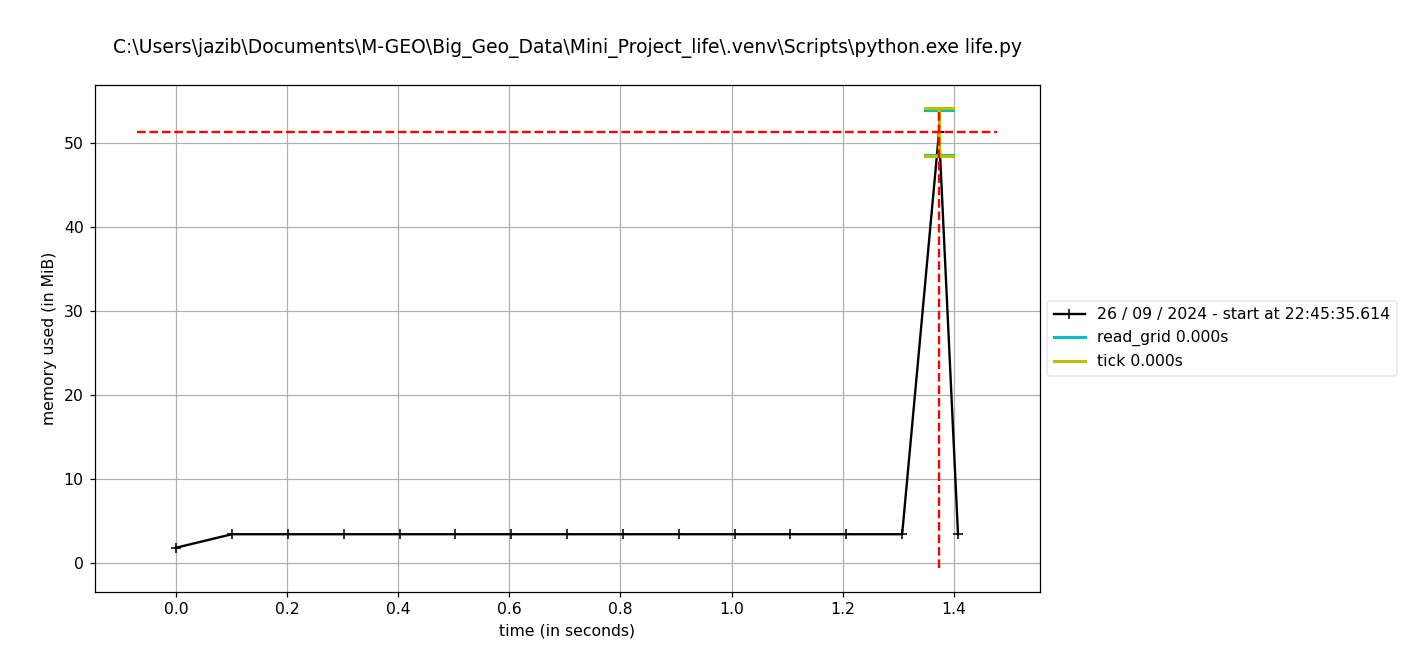